# Regularized Method for Regression

Cuando tus variables están muy correlacionadas, la regresión lineal “normal” reparte mal los pesos y los coeficientes se vuelven inestables.  
Si cae una variable, todo el modelo puede venirse abajo.

---

## Coeficiente
En el contexto de regresión lineal, un **coeficiente** es, en esencia, un número que mide la fuerza y dirección con que una variable predictora (por ejemplo, “número de habitaciones”) influye en la variable objetivo (por ejemplo, “precio de la casa”).

---

## Métodos de Regularización

### 🔹 Ridge Regression
- Ayuda a **estabilizar los coeficientes altos**.  
- Matemáticamente, minimiza todos los coeficientes un poco.  

---

### 🔹 Least Absolute Shrinkage (LASSO)
- Afecta a los coeficientes muy pequeños.  
- Puede **reducirlos a 0** si no aportan mucho al modelo.  

---

### 🔹 Elastic Net
- **Combina Ridge y LASSO**.  
- Minimiza los coeficientes muy grandes y elimina los muy pequeños.  
- Es ideal cuando muchas variables están altamente correlacionadas.  

---

### ❗ Problema con la regresión lineal “normal”
Cuando tus variables están muy correlacionadas:  
- La regresión lineal reparte mal los pesos.  
- Los coeficientes se vuelven inestables.  
- Si una variable cae, todo el modelo puede venirse abajo.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

# 📈 Regresión Lineal

La **regresión lineal** es un método estadístico y de *machine learning* que se utiliza para **modelar la relación entre una variable dependiente (objetivo)** y **una o más variables independientes (predictoras)**.  

---

## 📌 Idea principal
- Busca una **recta (o un hiperplano, si hay más de una variable)** que se ajuste lo mejor posible a los datos.  
- Esa recta representa la relación promedio entre las variables.  

---

## 📐 Ecuación general (una variable)
\[
y = \beta_0 + \beta_1 x + \varepsilon
\]

- \( y \): variable dependiente (lo que queremos predecir).  
- \( x \): variable independiente (predictora).  
- \( \beta_0 \): intercepto (valor de \( y \) cuando \( x=0 \)).  
- \( \beta_1 \): coeficiente (pendiente, cuánto cambia \( y \) si \( x \) aumenta en 1).  
- \( \varepsilon \): error o ruido (parte que no explica el modelo).  

---

## 📊 Ejemplo
Si queremos predecir el **precio de una casa (y)** a partir del **número de habitaciones (x)**, la regresión lineal estima una recta que nos dice **cuánto aumenta en promedio el precio por cada habitación extra**.  

---

👉 En resumen:  
La regresión lineal es como **dibujar la línea recta que mejor resume los datos**, permitiendo hacer predicciones y entender relaciones entre variables.


Coeficiente estimado:  [0.47134857]


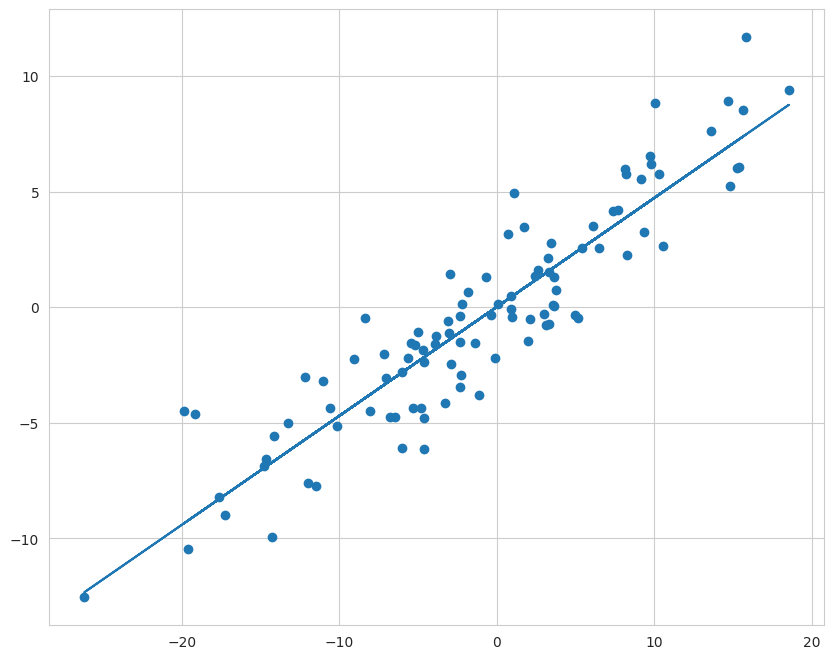

In [4]:
from sklearn.linear_model import LinearRegression
# Fijamos la semilla del generador de numeros aleatorios, de forma que estableciendo esto tendremos siempre los mismos datos
np.random.seed(42)
# Establecemos el numero de puntos que queremos generar (100)
n_samples = 100
# Genera numeros aleatorios cumpliendo los porcentages de una campana de Gauss teniendo el 0 como punto medio, luego se multiplica por 10 el resultado, teniendo un array de 100 datos
rng = np.random.randn(n_samples) * 10
# Generamos los valores de y a partir de x 
    # - 0.5 * rng -> por cada unidad de x, y sube 0,5. Esto seria la linea perfecta
    # - 2 * np.random.randn(n_samples) -> añadimos un toque de desorden a la distribucion de puntos, volviendo a pedir 100 numeros como antes y multiplicando el resultado por 2, que se suma a la linea
        # perfecta anterior haciendo que el punto se desplace en el eje y hacia arriba o hacia abajo
y_gen = 0.5 * rng + 2 * np.random.randn(n_samples)

# Creamos y ajustamos el modelo
lr = LinearRegression()
lr.fit(rng.reshape(-1, 1), y_gen)
# Tenemos un array, asi que para que sklearn lo interprete bien lo pasamos a matriz
model_pred = lr.predict(rng.reshape(-1, 1))

plt.figure(figsize = (10, 8))
plt.scatter(rng, y_gen)
plt.plot(rng, model_pred)
print("Coeficiente estimado: ", lr.coef_)

# 📈 Regular Regression (con outliers)

La **Regular Regression** en este contexto se refiere a aplicar la regresión lineal “normal” pero **incluyendo valores extremos (outliers)** en los datos.  

Esto permite observar cómo los outliers pueden afectar de manera significativa a los coeficientes y a la línea ajustada.  

---

## 📌 Idea principal
- La regresión lineal estándar es muy **sensible a los outliers**.  
- Un par de puntos extremos pueden cambiar mucho la pendiente de la recta.  
- Esto genera un modelo **menos representativo** para la mayoría de los datos.  

---

## 📐 Ejemplo con outliers
1. Se generan datos aleatorios siguiendo una relación aproximadamente lineal.  
2. Se introducen dos valores extremos:
   - Uno con valor muy alto.  
   - Otro con valor muy bajo.  
3. Se vuelve a ajustar la regresión lineal.  

---

## 📊 Resultados observados
- Antes de los outliers, el coeficiente estimado era ≈ **0.47**.  
- Después de añadir los outliers, el coeficiente estimado pasa a ≈ **1.50**.  
- La recta de regresión cambia drásticamente, dejando de reflejar la tendencia real de la mayoría de los puntos.  

---

👉 En resumen:  
La **regresión lineal estándar** no es robusta a valores extremos.  
Aquí es donde entran en juego métodos como **Ridge, Lasso o Elastic Net**, que ayudan a estabilizar el modelo frente a este tipo de problemas.  


In [5]:
# Introducimos un valor extremo de y donde x es maximo
idx = rng.argmax()
y_gen[idx] = 200
# Introducimos un valor extremo de y donde x es minimo
idx = rng.argmin()
y_gen[idx] = -200

Coeficiente de prediccion:  [1.50556072]


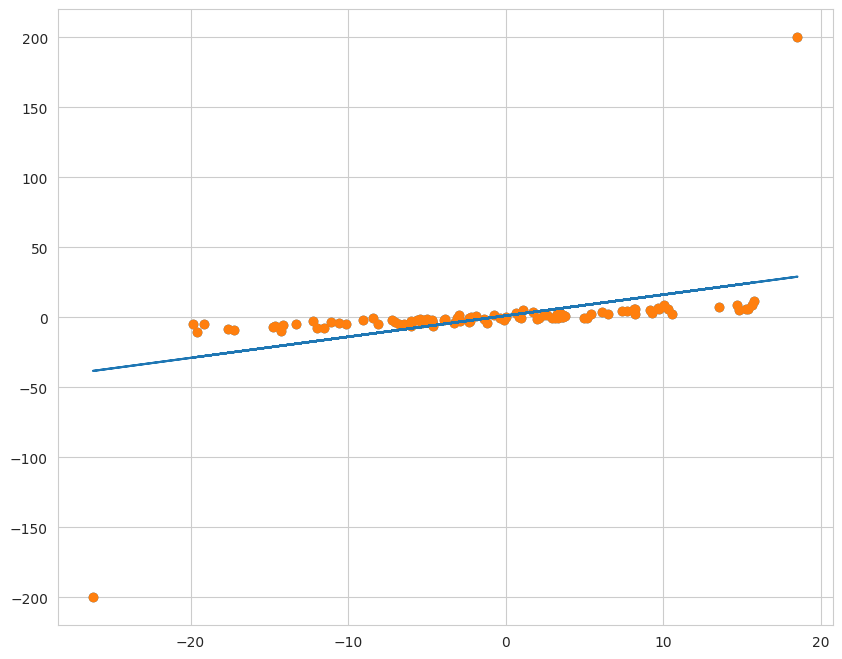

In [6]:
plt.figure(figsize = (10, 8))
plt.scatter(rng, y_gen)

# Creamos y ajustamos el modelo incluyendo los dos outliers que hemos creado
o_lr = LinearRegression()
o_lr.fit(rng.reshape(-1, 1), y_gen)
o_model_pred = o_lr.predict(rng.reshape(-1, 1))

plt.scatter(rng, y_gen)
plt.plot(rng, o_model_pred)
print("Coeficiente de prediccion: ", o_lr.coef_)

# 📉 Ridge Regression

La **Ridge Regression** (también llamada **Tikhonov regularization**) es una extensión de la regresión lineal que incorpora un **término de penalización** para evitar que los coeficientes se vuelvan demasiado grandes o inestables.  

---

## 📌 Idea principal
- La regresión lineal estándar puede volverse **inestable** cuando:
  - Hay muchas variables predictoras.
  - Las variables están **altamente correlacionadas**.
  - Existen **outliers** que afectan la pendiente.  
- Ridge agrega una penalización que **reduce la magnitud de los coeficientes** para estabilizar el modelo.  

---

## 📐 Función de coste

\[
\text{RSS}_{ridge} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^p \beta_j^2
\]

- \( \sum (y_i - \hat{y}_i)^2 \): error cuadrático (igual que en regresión lineal).  
- \( \alpha \): hiperparámetro que controla la fuerza de la penalización.  
- \( \beta_j \): coeficientes del modelo.  
- El término adicional \( \alpha \sum \beta_j^2 \) es la **penalización L2**.  

---

## 🎯 Efectos de la penalización
- Si \( \alpha = 0 \): Ridge es equivalente a regresión lineal normal.  
- Si \( \alpha \) es grande: los coeficientes se acercan a cero, pero **nunca llegan exactamente a 0**.  
- Esto ayuda a evitar el **overfitting** y a mejorar la **estabilidad** del modelo.  

---

## 📊 Ejemplo intuitivo
- En un modelo de predicción de precios de casas, algunas variables (como número de habitaciones y tamaño en m²) pueden estar correlacionadas.  
- La regresión lineal normal puede repartir mal el peso entre ellas.  
- Ridge penaliza los coeficientes grandes, logrando un modelo más **robusto** y **equilibrado**.  

---

👉 En resumen:  
La **Ridge Regression** mantiene todas las variables en el modelo, pero **reduce sus coeficientes** para evitar inestabilidad y sobreajuste.


Coeficiente de predicción (Ridge): [1.5037191]


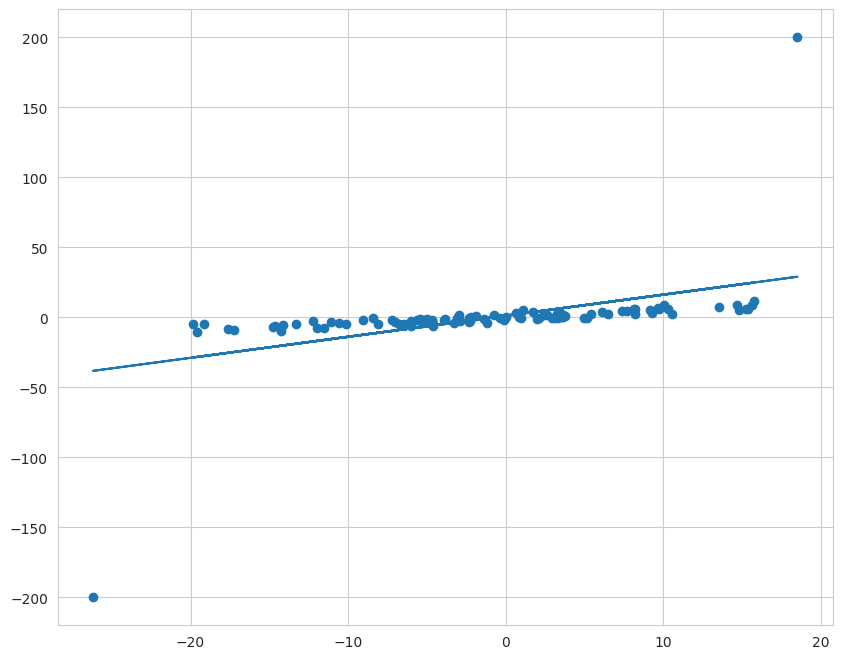

In [20]:
from sklearn.linear_model import Ridge

ridge_mod = Ridge(alpha=10)
ridge_mod.fit(rng.reshape(-1, 1), y_gen)
ridge_mod_pred = ridge_mod.predict(rng.reshape(-1, 1))

plt.figure(figsize=(10, 8))
plt.scatter(rng, y_gen)
plt.plot(rng, ridge_mod_pred)
print("Coeficiente de predicción (Ridge):", ridge_mod.coef_)

# 📉 Lasso Regression

La **Lasso Regression** (Least Absolute Shrinkage and Selection Operator) es un método de regularización para la regresión lineal que utiliza una penalización **L1** sobre los coeficientes.  

---

## 📌 Idea principal
- Similar a Ridge, busca estabilizar el modelo cuando hay **multicolinealidad** o **muchas variables**.  
- La diferencia clave es que Lasso puede **llevar algunos coeficientes exactamente a 0**, realizando una **selección automática de variables**.  

---

## 📐 Función de coste

\[
\text{RSS}_{lasso} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^p |\beta_j|
\]

- \( \sum (y_i - \hat{y}_i)^2 \): error cuadrático.  
- \( \alpha \): hiperparámetro que controla la penalización.  
- \( |\beta_j| \): valor absoluto de los coeficientes.  

---

## 🎯 Efectos de la penalización
- Si \( \alpha = 0 \): Lasso es equivalente a regresión lineal normal.  
- Si \( \alpha \) es grande: muchos coeficientes se reducen a **0**.  
- Esto permite:
  - Reducir el **overfitting**.  
  - Simplificar el modelo.  
  - Identificar las variables más importantes.  

---

## 📊 Ejemplo intuitivo
En un modelo de predicción de precios de casas con muchas variables (habitaciones, baños, ubicación, año de construcción, etc.):  
- La regresión lineal normal intentaría asignar un peso a cada variable.  
- **Lasso eliminaría automáticamente** las menos relevantes (coeficiente = 0) y mantendría solo las más significativas.  

---

👉 En resumen:  
La **Lasso Regression** no solo estabiliza el modelo, sino que también lo hace más simple y fácil de interpretar gracias a la **selección de variables**.


Coeficiente de prediccion:  [1.38309007]


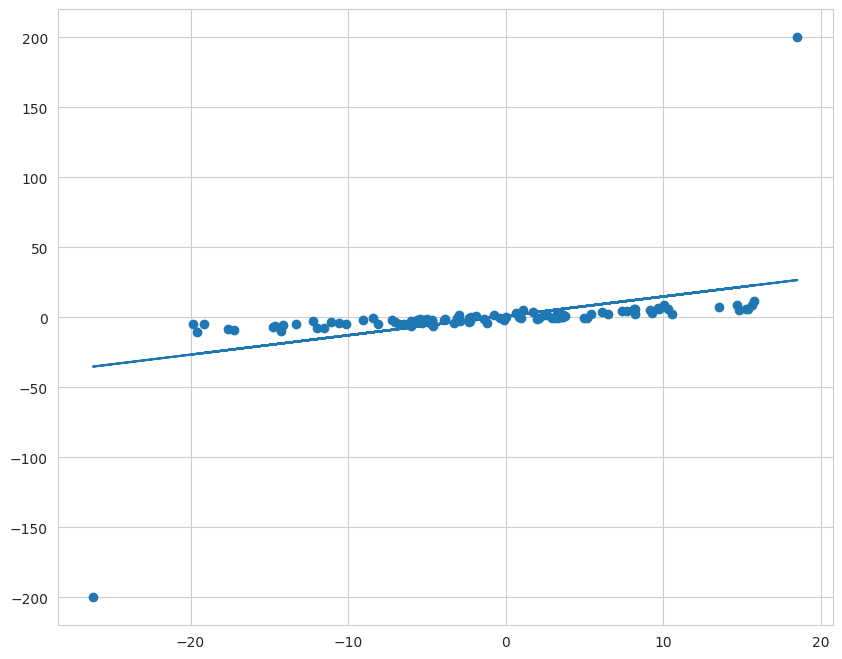

In [18]:
from sklearn.linear_model import Lasso

# Creamos el modelo Lasso y controlamos la fuerza de corte de 0.5 -> cuanto mayor, mas 0s obtendremos
lasso_mod = Lasso(alpha = 10)
lasso_mod.fit(rng.reshape(-1, 1), y_gen)
lasso_mod_pred = lasso_mod.predict(rng.reshape(-1, 1))

plt.figure(figsize = (10, 8))
plt.scatter(rng, y_gen)
plt.plot(rng, lasso_mod_pred)
print("Coeficiente de prediccion: ", lasso_mod.coef_)

---
---
# Regularización en Ridge y Lasso: efecto de `alpha`

## 🔹 Qué es `alpha`
En los modelos **Ridge** y **Lasso**, el parámetro `alpha` controla la **fuerza de la regularización** (la penalización que se aplica a los coeficientes):

- **Ridge (L2):**
  \[
  \text{MSE} + \alpha \sum \beta_j^2
  \]

- **Lasso (L1):**
  \[
  \text{MSE} + \alpha \sum |\beta_j|
  \]

---

## 🔹 Efecto de cambiar `alpha`

1. **Alpha = 0**
   - Ridge y Lasso se convierten en una regresión lineal normal (`LinearRegression`).
   - No hay penalización → los coeficientes se ajustan libremente.

2. **Alpha pequeño (0.1, 0.5, 1)**
   - Penalización leve.
   - Los coeficientes son casi iguales a los de `LinearRegression`.

3. **Alpha grande (10, 100, 1000 …)**
   - **Ridge:** los coeficientes se **encogen hacia 0**, pero ninguno desaparece.
   - **Lasso:** muchos coeficientes se hacen **exactamente 0** → actúa como **selección de variables**.

4. **Alpha enorme (1e6 …)**
   - **Ridge:** todos los coeficientes ≈ 0 → el modelo predice casi la **media de `y`**.
   - **Lasso:** también elimina todos los coeficientes → el modelo queda prácticamente "muerto".

---

## 🔹 Intuición
Piensa en `alpha` como un **freno para los coeficientes**:
- Si `alpha` es bajo → el modelo puede poner pendientes grandes para ajustarse mejor.
- Si `alpha` es alto → el modelo está limitado → coeficientes más pequeños, menos varianza, pero también menos capacidad de ajuste.

---

## 🔹 Lo que **NO** hace `alpha`
- No elimina el efecto de **outliers**.
- No arregla automáticamente los datos.
- Solo controla cuánto se permiten estirar los coeficientes.

---


---
---

# 📉 Elastic Net Regression

La **Elastic Net Regression** combina las penalizaciones de **Ridge (L2)** y **Lasso (L1)**, obteniendo lo mejor de ambos métodos.  

---

## 📌 Idea principal
- **Ridge**: reduce todos los coeficientes grandes, pero no los elimina.  
- **Lasso**: elimina los coeficientes pequeños (los lleva a 0), realizando selección de variables.  
- **Elastic Net**: hace ambas cosas a la vez:  
  - Reduce los coeficientes muy grandes.  
  - Elimina los coeficientes muy pequeños.  

Es especialmente útil cuando las variables están **altamente correlacionadas**.  

---

## 📐 Función de coste

\[
\text{RSS}_{elastic} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \Big( l1\_ratio \sum_{j=1}^p |\beta_j| + (1 - l1\_ratio) \sum_{j=1}^p \beta_j^2 \Big)
\]

- \( \alpha \): controla la fuerza total de la penalización.  
- \( l1\_ratio \): controla el equilibrio entre **Lasso (L1)** y **Ridge (L2)**.  
  - Si \( l1\_ratio = 1 \) → se comporta como **Lasso**.  
  - Si \( l1\_ratio = 0 \) → se comporta como **Ridge**.  
  - Valores intermedios → combinación de ambos.  

---

## 🎯 Efectos principales
- Permite manejar datos con **muchas variables correlacionadas**.  
- Realiza una **selección parcial de variables** (como Lasso).  
- Evita inestabilidades y mantiene robustez (como Ridge).  

---

## 📊 Ejemplo intuitivo
En un dataset con muchas variables explicativas (ejemplo: distintas características de casas donde varias están muy correlacionadas entre sí):  
- La regresión lineal normal reparte mal los pesos.  
- Ridge estabiliza, pero no elimina variables.  
- Lasso elimina algunas variables, pero puede ser demasiado agresivo.  
- **Elastic Net combina ambos efectos**, manteniendo equilibrio entre estabilidad y simplicidad.  

---

👉 En resumen:  
La **Elastic Net Regression** es un método híbrido que combina **Ridge y Lasso**, siendo ideal cuando las variables están altamente correlacionadas y se busca un modelo más **robusto y parsimonioso**.


Coeficiente de prediccion:  [1.36098504]


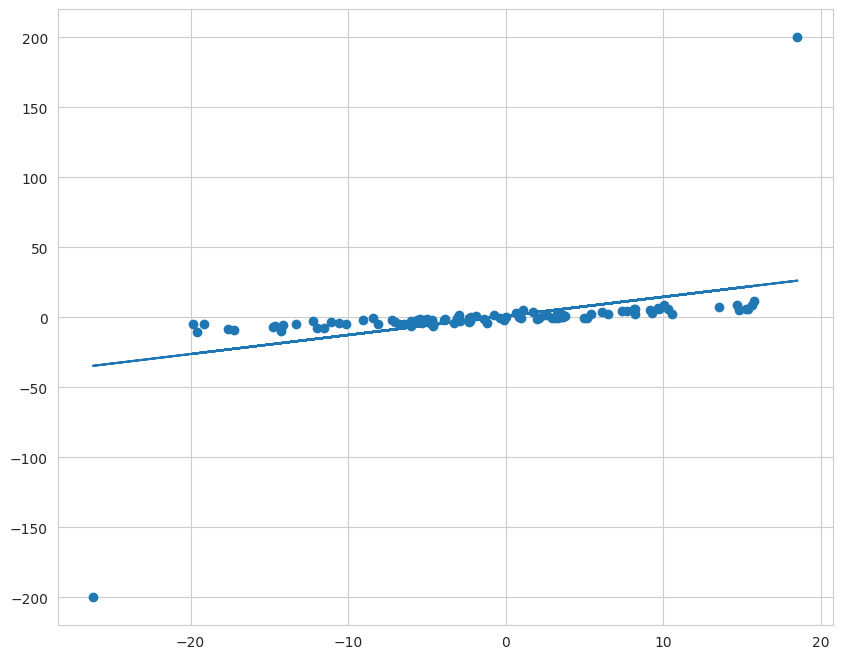

In [19]:
from sklearn.linear_model import ElasticNet

# Creamos el modelo ElasticNet y controlamos fuerza total de la penalización de 0.02 -> cuánto “castigo” pones sobre los coeficientes grandes
    # Alpha controla el equilibrio entre:
        # Ajustar bien (minimizar los errores en tus datos).
        # Mantener los coeficientes pequeños (evitar que sean erráticos o inflados).
en_mod = ElasticNet(alpha = 10)
en_mod.fit(rng.reshape(-1, 1), y_gen)
en_mod_pred = en_mod.predict(rng.reshape(-1, 1))

plt.figure(figsize = (10, 8))
plt.scatter(rng, y_gen)
plt.plot(rng, en_mod_pred)
print("Coeficiente de prediccion: ", en_mod.coef_)